In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load your data
df = pd.read_csv('social_media_viral_content_dataset.csv')

In [3]:
df

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SM_101995,YouTube Shorts,text,Sports,es,US,2024-02-11 00:00:00,#funny #music #ai,14112183,486627,9430,91550,0.0416,-0.541,1
1996,SM_101996,Instagram,text,Politics,en,Brazil,2024-02-12 00:00:00,#viral #trending,5604744,467062,2764,16092,0.0867,0.287,1
1997,SM_101997,X,carousel,Education,ur,UK,2024-05-01 00:00:00,#trending #fyp,2031920,253990,40963,95697,0.1923,0.604,1
1998,SM_101998,X,carousel,Sports,ur,UK,2024-12-23 00:00:00,#funny #trending #tech,5237350,209494,15042,67422,0.0557,-0.861,1


In [6]:
print(df.columns)

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'views', 'likes', 'comments', 'shares',
       'engagement_rate', 'sentiment_score', 'is_viral'],
      dtype='object')


In [9]:
avg_likes = df['likes'].mean()
filtered_df = df[df['likes'] > avg_likes]
filtered_df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
5,SM_100005,Instagram,carousel,Sports,hi,Brazil,2024-11-01 00:00:00,#tech #music,6513472,465248,27485,25659,0.0796,-0.907,1
7,SM_100007,X,text,Technology,es,Pakistan,2024-07-26 00:00:00,#trending #tech #news,2961423,329047,31556,11395,0.1256,0.215,1
8,SM_100008,YouTube Shorts,text,Sports,es,Pakistan,2024-03-03 00:00:00,#music #tech #news #trending,3916736,489592,14507,87314,0.1510,0.884,1
10,SM_100010,X,text,Entertainment,hi,India,2024-11-12 00:00:00,#trending #fyp #news,3034812,252901,23488,48556,0.1071,-0.931,1


In [14]:
# 1. Group by Category
grouped = df.groupby('region')

# 2. Calculate Mean and Count
analysis = grouped['likes'].agg(['mean', 'count'])
print("\nGroup Analysis:")
print(analysis)

# 3. Convert grouped mean to NumPy array
avg_likes = analysis['mean'].to_numpy()
print("\nNumPy Array of Means:", avg_likes)


Group Analysis:
                   mean  count
region                        
Brazil    247002.194030    402
India     242235.573892    406
Pakistan  249704.068602    379
UK        249325.916883    385
US        239223.464953    428

NumPy Array of Means: [247002.19402985 242235.57389163 249704.06860158 249325.91688312
 239223.46495327]


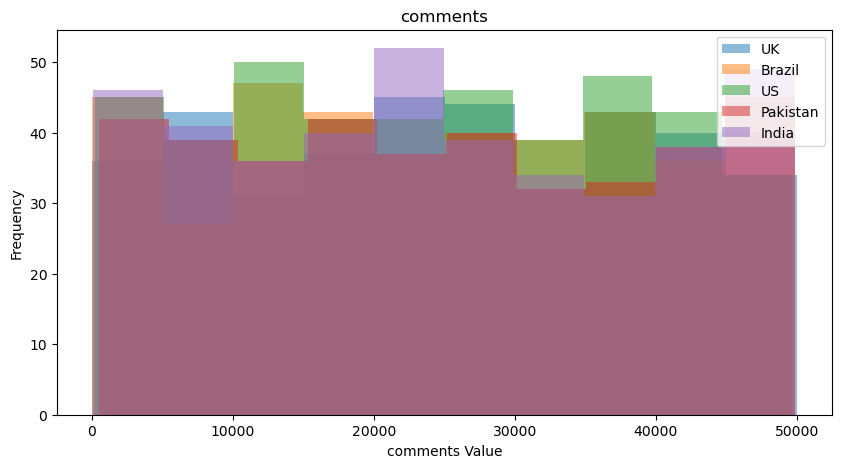

In [19]:
## Task 3: Comparative Visualization
# 1. Histogram comparing groups
plt.figure(figsize=(10, 5))
for region in df['region'].unique():
    plt.hist(df[df['region'] == region]['comments'], alpha=0.5, label=region)

plt.title('comments')
plt.xlabel('comments Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

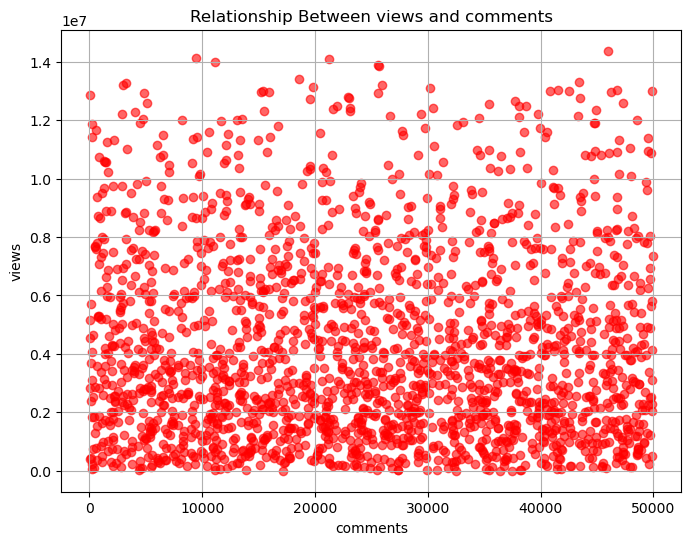

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['comments'], df['views'], color='red', alpha=0.6)
plt.title('Relationship Between views and comments')
plt.xlabel('comments')
plt.ylabel('views')
plt.grid(True)
plt.show()

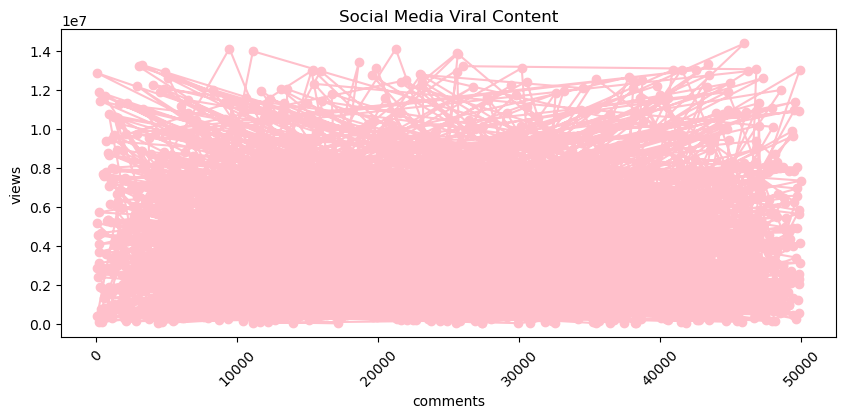

In [27]:
# Task 4: Trend & Distribution Analysis
plt.figure(figsize=(10, 4))
plt.plot(df['comments'], df['views'], marker='o', linestyle='-', color='pink')
plt.title('Social Media Viral Content')
plt.xlabel('comments')
plt.ylabel('views')
plt.xticks(rotation=45)
plt.show()

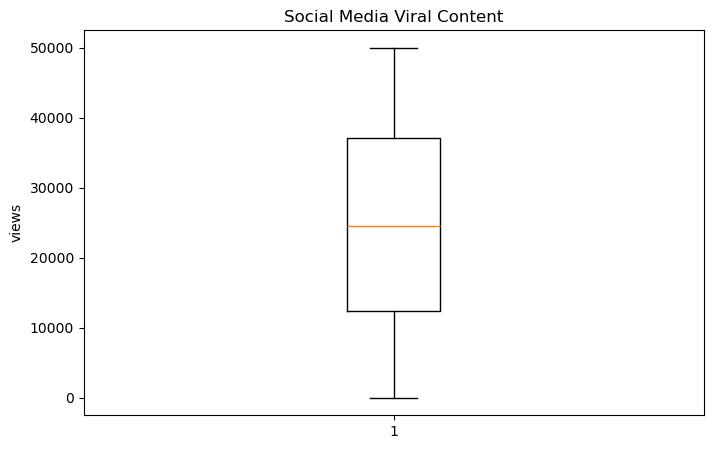

In [28]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['comments'])
plt.title('Social Media Viral Content')
plt.ylabel('views')
plt.show()

### Analysis Revelations:

Trend Chart: Reveals seasonality or specific dates where social media viral content spiked, helping identify high-performance periods.

Distribution Chart (Box Plot): Reveals the median Social Media Viral Content value and highlights outliers (extreme high or low values) that might skew the average.

## Task 5: Data Science Reflection
What patterns did you observe?
Example: 
I observed a strong positive correlation in the scatter plot; as Sales increase, Profit generally increases, though some regions have higher operating costs that lower the margin.
Which library did you find most useful and why? Example: Pandas was most useful because its .groupby() and filtering methods allow for complex data cleaning with very little code, making it the backbone of the analysis.

How would this analysis help a business make decisions?
Example: By identifying which regions have sales below the mean (Task 1 & 2), a business can reallocate marketing budgets to underperforming areas or investigate why specific regions are more profitable than others.